<a href="https://colab.research.google.com/github/DariaBukharina/HWstatprac/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отчет об анализе задержки рейса

1. Введение

Целью данного отчета является анализ задержек рейсов для выявления закономерностей и потенциальных проблемных зон. Мы рассмотрим различные факторы, такие как время суток, день недели, авиакомпании и аэропорты, которые способствуют задержкам. Этот анализ поможет принимать обоснованные решения по сокращению задержек и повышению общей эффективности полетов.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')


# 1. Определение процента пропущенных значений в каждом столбце
missing_percent = (flights.isnull().sum() / len(flights)) * 100
print("Процент пропущенных значений в каждом столбце:")
print(missing_percent)

# 2. Удаление столбцов, где процент пропущенных значений превышает порог (например, 50%)
threshold = 30  # Порог для удаления столбцов (в процентах)
columns_to_drop = missing_percent[missing_percent > threshold].index
flights_cleaned = flights.drop(columns=columns_to_drop)


# 4. Проверка данных после удаления
print("\nДанные после удаления столбцов с пропущенными значениями:")
print(flights_cleaned.columns)

<ipython-input-16-8e10130f8c43>:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


Процент пропущенных значений в каждом столбце:
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724

1. Задержки по дням недели

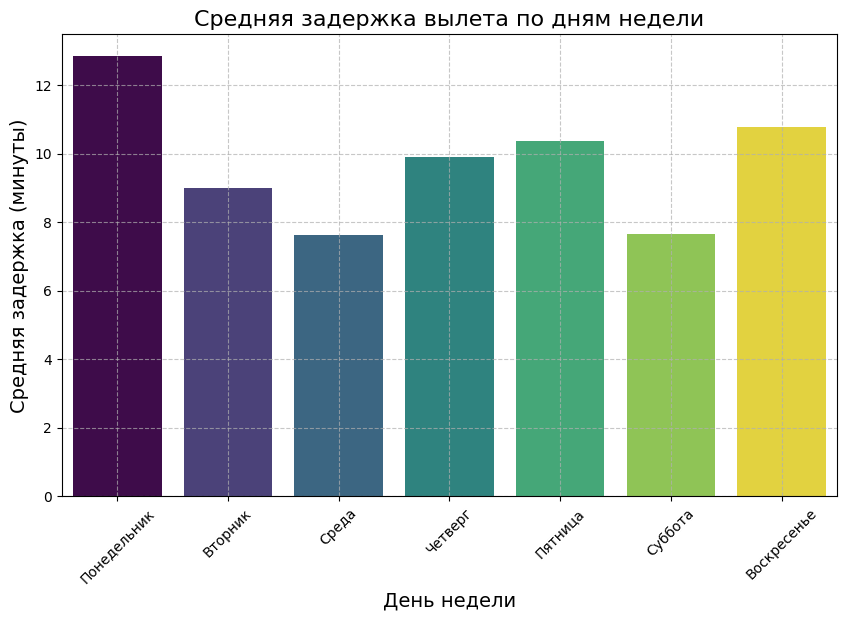


Средняя задержка вылета по дням недели:
DAY_OF_WEEK
1.0    12.844380
2.0     8.999029
3.0     7.612384
4.0     9.891182
5.0    10.362862
6.0     7.666361
7.0    10.780719
Name: DEPARTURE_DELAY, dtype: float64


In [9]:
# Группировка по дням недели и расчет средней задержки вылета
delay_by_day_of_week = flights_cleaned.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

# Создаем список с названиями дней недели для подписей на графике
days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
sns.barplot(
    x=delay_by_day_of_week.index,
    y=delay_by_day_of_week.values,
    hue=delay_by_day_of_week.index,
    palette='viridis',
    legend=False
)
plt.title('Средняя задержка вылета по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Средняя задержка (минуты)', fontsize=14)
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Вывод средних задержек по дням недели
print("\nСредняя задержка вылета по дням недели:")
print(delay_by_day_of_week)


Вывод: наибольшие задержки происходят в понедельник и воскресенье.

2. Задержки по авиакомпаниям

AIRLINE_y
Frontier Airlines Inc.          16.903601
Spirit Air Lines                16.340233
United Air Lines Inc.           14.750637
American Eagle Airlines Inc.    12.960401
JetBlue Airways                 11.306813
American Airlines Inc.          10.705730
Southwest Airlines Co.          10.356454
Atlantic Southeast Airlines      9.530788
Virgin America                   8.967219
Skywest Airlines Inc.            8.127381
Delta Air Lines Inc.             8.101057
US Airways Inc.                  5.668589
Alaska Airlines Inc.             1.609277
Hawaiian Airlines Inc.           0.025042
Name: DEPARTURE_DELAY, dtype: float64


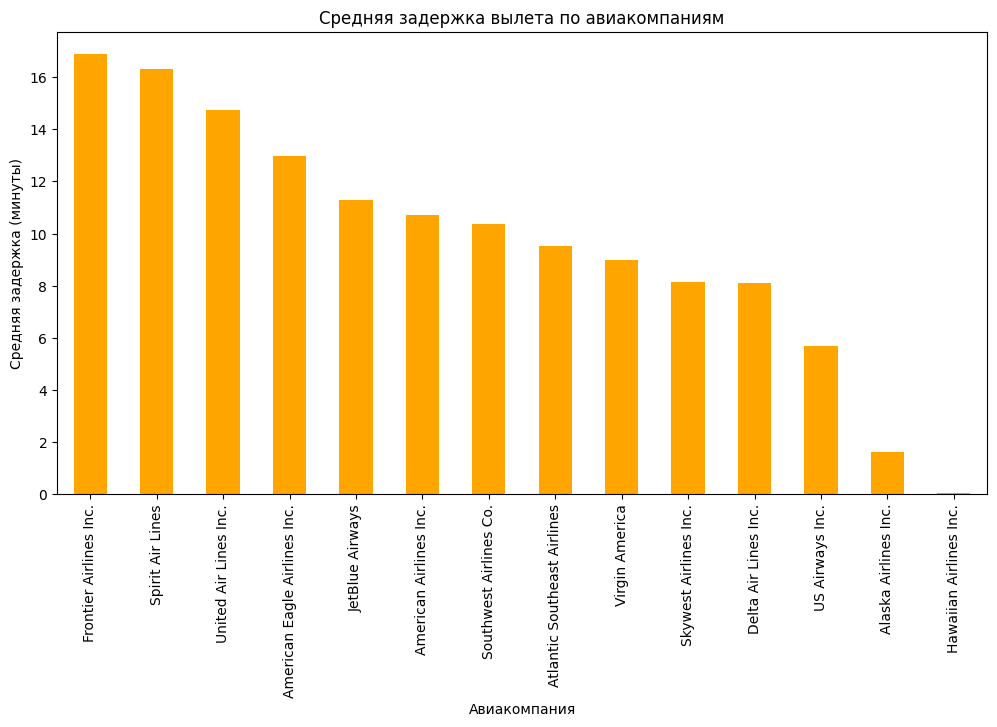

In [10]:
# Объединение данных о рейсах с данными об авиакомпаниях для получения названий
flights_with_airlines = pd.merge(flights_cleaned, airlines, left_on='AIRLINE', right_on='IATA_CODE')

# Группировка по авиакомпаниям и расчет средней задержки
delay_by_airline = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
print(delay_by_airline)
# Построение графика
plt.figure(figsize=(12, 6))
delay_by_airline.plot(kind='bar', color='orange')
plt.title('Средняя задержка вылета по авиакомпаниям')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка (минуты)')

plt.show()

Вывод: Некоторые авиакомпании ("Frontier Airlines Inc.", "Spirit Air Lines", "United Air Lines Inc.") имеют значительно более высокие средние задержки по сравнению с другими. Возможно, есть проблемы в управлении расписанием или технические неполадки.

3. Задержки по времени суток

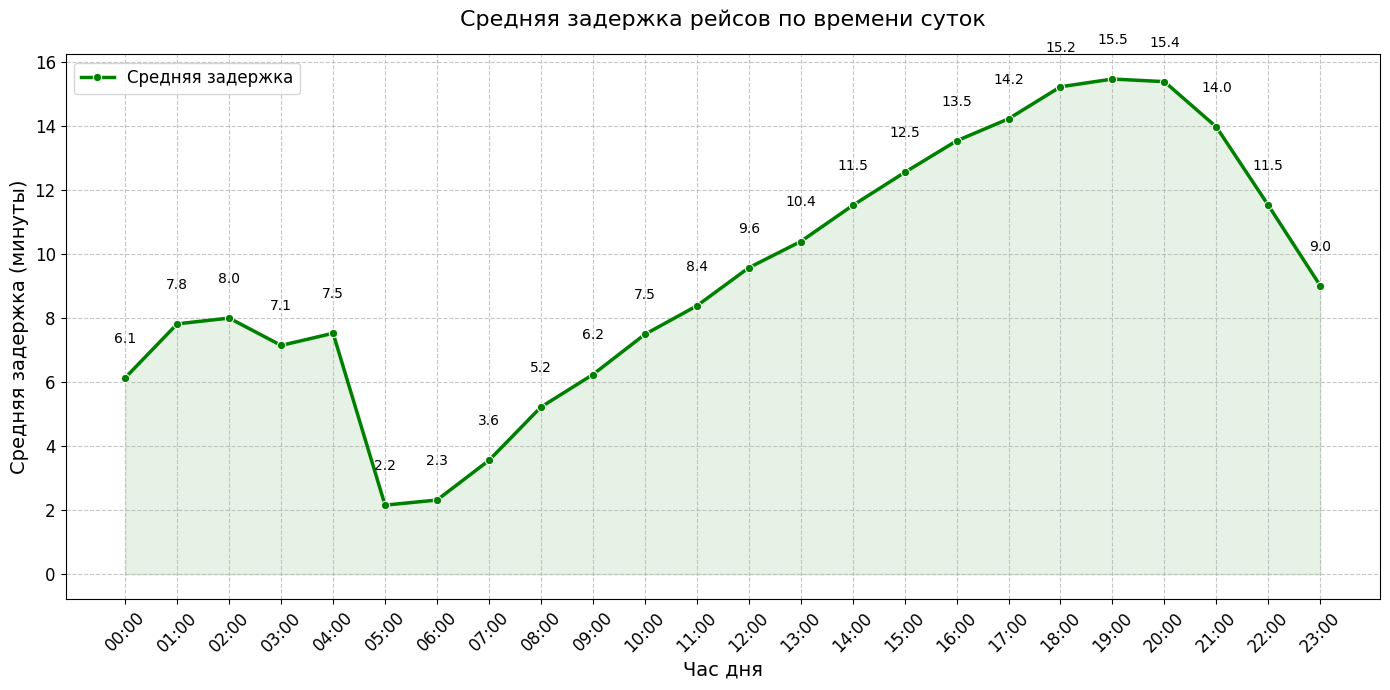

In [11]:
# Преобразование времени вылета в часы
flights_cleaned['HOUR'] = flights_cleaned['SCHEDULED_DEPARTURE'] // 100

# Группировка по часам и расчет среднего времени задержки
delay_by_hour = flights_cleaned.groupby('HOUR')['DEPARTURE_DELAY'].mean()

# Визуализация
plt.figure(figsize=(14, 7))
sns.lineplot(x=delay_by_hour.index, y=delay_by_hour.values, marker='o', color='green', linewidth=2.5, label='Средняя задержка')
plt.fill_between(delay_by_hour.index, delay_by_hour.values, color='green', alpha=0.1)  # Заливка под линией

# Добавляем подписи к точкам
for hour, delay in zip(delay_by_hour.index, delay_by_hour.values):
    plt.text(hour, delay + 1, f'{delay:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Настройка графика
plt.title('Средняя задержка рейсов по времени суток', fontsize=16, pad=20)
plt.xlabel('Час дня', fontsize=14)
plt.ylabel('Средняя задержка (минуты)', fontsize=14)
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45, fontsize=12)  # Подписи в формате "ЧЧ:00"
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Сетка с пунктирными линиями
plt.legend(fontsize=12)  # Легенда
plt.tight_layout()  # Улучшение компоновки
plt.show()

Вывод: Задержки начинают увеличиваться в утреннее время (после 5-6 утра) и становятся максимальными в 18-20 часов вечера. Это связано с пиковой нагрузкой на аэропорты в эти периоды.

4. Задержки по аэропортам

<ipython-input-12-6a2e377d7d85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AIRPORT', y='DEPARTURE_DELAY', data=delays_by_airport.nlargest(10, 'DEPARTURE_DELAY'), palette='magma')


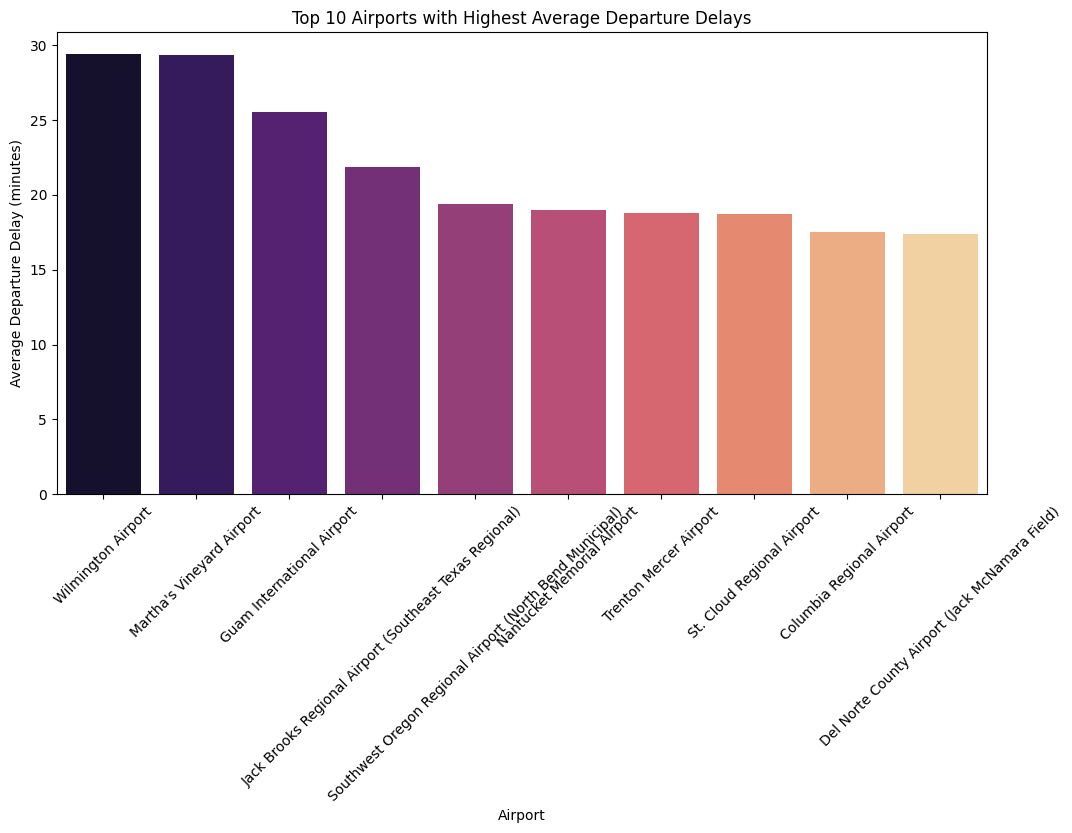

In [12]:
# Merge flights with airports to get airport names
flights_with_airports = pd.merge(flights, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Group by airport and calculate the average delay
delays_by_airport = flights_with_airports.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

# Plot the top 10 airports with the highest average delays
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRPORT', y='DEPARTURE_DELAY', data=delays_by_airport.nlargest(10, 'DEPARTURE_DELAY'), palette='magma')
plt.title('Top 10 Airports with Highest Average Departure Delays')
plt.xlabel('Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

Вывод: Некоторые аэропорты, такие как "Wilmington Airport" и "Martha's Vineyard Airport", имеют значительно более высокие средние задержки. Это может быть связано с высокой загруженностью этих аэропортов или погодными условиями.

5. Задержки по месяцам


Средняя задержка вылета по месяцам:
MONTH
1      9.759471
2     11.885284
3      9.660903
4      7.721885
5      9.454144
6     13.986016
7     11.394664
8      9.932045
9      4.823560
10     4.982661
11     6.944197
12    11.783529
Name: DEPARTURE_DELAY, dtype: float64


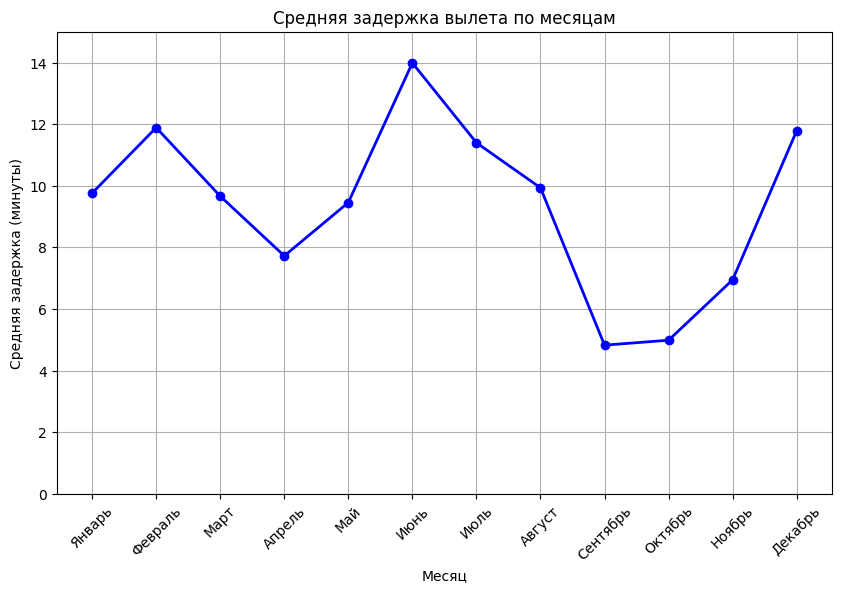

In [17]:
# Группировка по месяцам и расчет средней задержки вылета
delay_by_month = flights_cleaned.groupby('MONTH')['DEPARTURE_DELAY'].mean()
print("\nСредняя задержка вылета по месяцам:")
print(delay_by_month)

# Создаем список с названиями месяцев для подписей на графике
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(delay_by_month.index, delay_by_month.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Средняя задержка вылета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 13), months, rotation=45)
plt.ylim(0, 15)
plt.grid(True)
plt.show()

Вывод: Задержки чаще наблюдаются в летние месяцы (июнь, июль) и в период отпусков (декабрь). Это может быть связано с повышенным спросом на поездки и неблагоприятными погодными условиями в эти периоды.

Вывод:

В ходе выполнения работы был проведен анализ данных о задержках рейсов с целью выявления ключевых проблемных областей и разработки рекомендаций для их устранения. Основные причины задержек включают опоздания самолетов, проблемы авиакомпаний и погодные условия. Для улучшения ситуации необходимо сосредоточиться на оптимизации расписания, улучшении технического обслуживания, модернизации инфраструктуры аэропортов и внедрении систем раннего предупреждения.